# Introduction to Data Science: Data Cleaning

In [143]:
import json
import requests
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

## Functions

In [94]:
def grab_json(req, key=False):
    """
    Grab info specified in `spec.json`.
    
    req: str
    Returns: dict
    """
    api = "https://api.opendota.com/api"
    req = api + req
    payload = {}
    if key:
        with open("api_key.txt") as f:
            key = f.read()
        payload['api_key'] = key
        
    r = requests.get(req, params=payload)
    return r.json()

## Organize Player Data

In [73]:
player = pd.DataFrame(grab_json("/players/37244929/recentMatches"))
player.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'xp_per_min', 'gold_per_min', 'hero_damage',
       'tower_damage', 'hero_healing', 'last_hits', 'lane', 'lane_role',
       'is_roaming', 'cluster', 'leaver_status', 'party_size'],
      dtype='object')

In [39]:
player = player[["hero_id", "kills", "deaths", "assists", "skill", "xp_per_min", "gold_per_min", "hero_damage",
        "tower_damage", "hero_healing", "last_hits", "lane", "lane_role", "duration"]]

player.head()

,hero_id,kills,deaths,assists,skill,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits,lane,lane_role,duration
0,64,1,7,7,2.0,306,189,13369,0,0,32,3.0,1.0,1744
1,84,7,10,17,2.0,445,310,20461,105,0,93,NaN,NaN,3828
2,110,2,8,14,NaN,402,208,21847,299,7028,60,1.0,1.0,3179
3,90,1,5,10,2.0,386,219,9260,244,828,37,3.0,1.0,2390
4,62,6,18,13,2.0,474,347,17232,122,0,68,NaN,NaN,3075


In [ ]:
player[["hero_id", ""]]

In [ ]:
# TODO: make gpm, kpm, lpm

## Organize Hero Data

In [21]:
heroes = pd.DataFrame(grab_json("/heroStats")).set_index("id", drop=True)
heroes = heroes[["localized_name", "primary_attr", "attack_type", "base_health", "base_health_regen", "base_mana",
        "base_mana_regen", "base_armor", "base_mr", "base_attack_min", "base_attack_max", "base_str",
        "base_agi", "base_int", "str_gain", "int_gain", "attack_range", "projectile_speed", "attack_rate",
        "move_speed", "turn_rate"]]

heroes.head()

,localized_name,primary_attr,attack_type,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,...,base_str,base_agi,base_int,str_gain,int_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
id,,,,,,,,,,,,,,,,,,,,,
1,Anti-Mage,agi,Melee,200,0.25,75,0.0,-1.0,25,29,...,23,24,12,1.3,1.8,150,0,1.4,310,0.5
2,Axe,str,Melee,200,2.75,75,0.0,-1.0,25,27,...,25,20,18,3.6,1.6,150,900,1.7,310,0.6
3,Bane,int,Ranged,200,NaN,75,0.0,1.0,25,35,...,23,23,23,2.6,2.6,400,900,1.7,305,0.6
4,Bloodseeker,agi,Melee,200,NaN,75,0.0,2.0,25,33,...,24,22,18,2.7,1.7,150,900,1.7,300,0.5
5,Crystal Maiden,int,Ranged,200,NaN,75,1.0,-1.0,25,30,...,18,16,14,2.2,3.3,600,900,1.7,275,0.5


In [106]:
hero_ids = list(heroes.index)
stats = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'last_hits_per_min', 'hero_damage_per_min', 'tower_damage']

hero_stats = []
for hero_id in hero_ids:
    hero = grab_json(f"/benchmarks/?hero_id={hero_id}", key=True)
    output = {}
    output["id"] = hero_id
    output["localized_name"] = heroes.loc[hero_id, "localized_name"]
    for stat in stats:
        output[stat] = hero['result'][stat][4]['value']
    hero_stats.append(output)

hero_stats

[{'id': 1,
  'localized_name': 'Anti-Mage',
  'gold_per_min': 618,
  'xp_per_min': 741,
  'kills_per_min': 0.1933145388642771,
  'last_hits_per_min': 9.494949494949495,
  'hero_damage_per_min': 488.07415036045313,
  'tower_damage': 5721},
 {'id': 2,
  'localized_name': 'Axe',
  'gold_per_min': 406,
  'xp_per_min': 559,
  'kills_per_min': 0.18547140649149924,
  'last_hits_per_min': 4.185136897001303,
  'hero_damage_per_min': 532.1484375,
  'tower_damage': 962},
 {'id': 3,
  'localized_name': 'Bane',
  'gold_per_min': 262,
  'xp_per_min': 437,
  'kills_per_min': 0.07855973813420622,
  'last_hits_per_min': 0.7588532883642496,
  'hero_damage_per_min': 271.45780051150894,
  'tower_damage': 350},
 {'id': 4,
  'localized_name': 'Bloodseeker',
  'gold_per_min': 490,
  'xp_per_min': 641,
  'kills_per_min': 0.2274881516587678,
  'last_hits_per_min': 5.829545454545454,
  'hero_damage_per_min': 631.1444805194806,
  'tower_damage': 2797},
 {'id': 5,
  'localized_name': 'Crystal Maiden',
  'gold_per

In [111]:
hero_stats = pd.DataFrame(hero_stats).set_index("id", drop=True)

In [112]:
hero_stats

,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
id,,,,,,,
1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
2,Axe,406,559,0.185471,4.185137,532.148438,962
3,Bane,262,437,0.078560,0.758853,271.457801,350
4,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797
5,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299
6,Drow Ranger,494,617,0.190880,6.192893,588.543165,5347
7,Earthshaker,315,490,0.096899,2.207732,403.838384,465
8,Juggernaut,534,663,0.207809,7.174571,581.085044,4811
9,Mirana,331,494,0.120289,2.486884,374.505988,1015


## Basic Plotting + Clustering

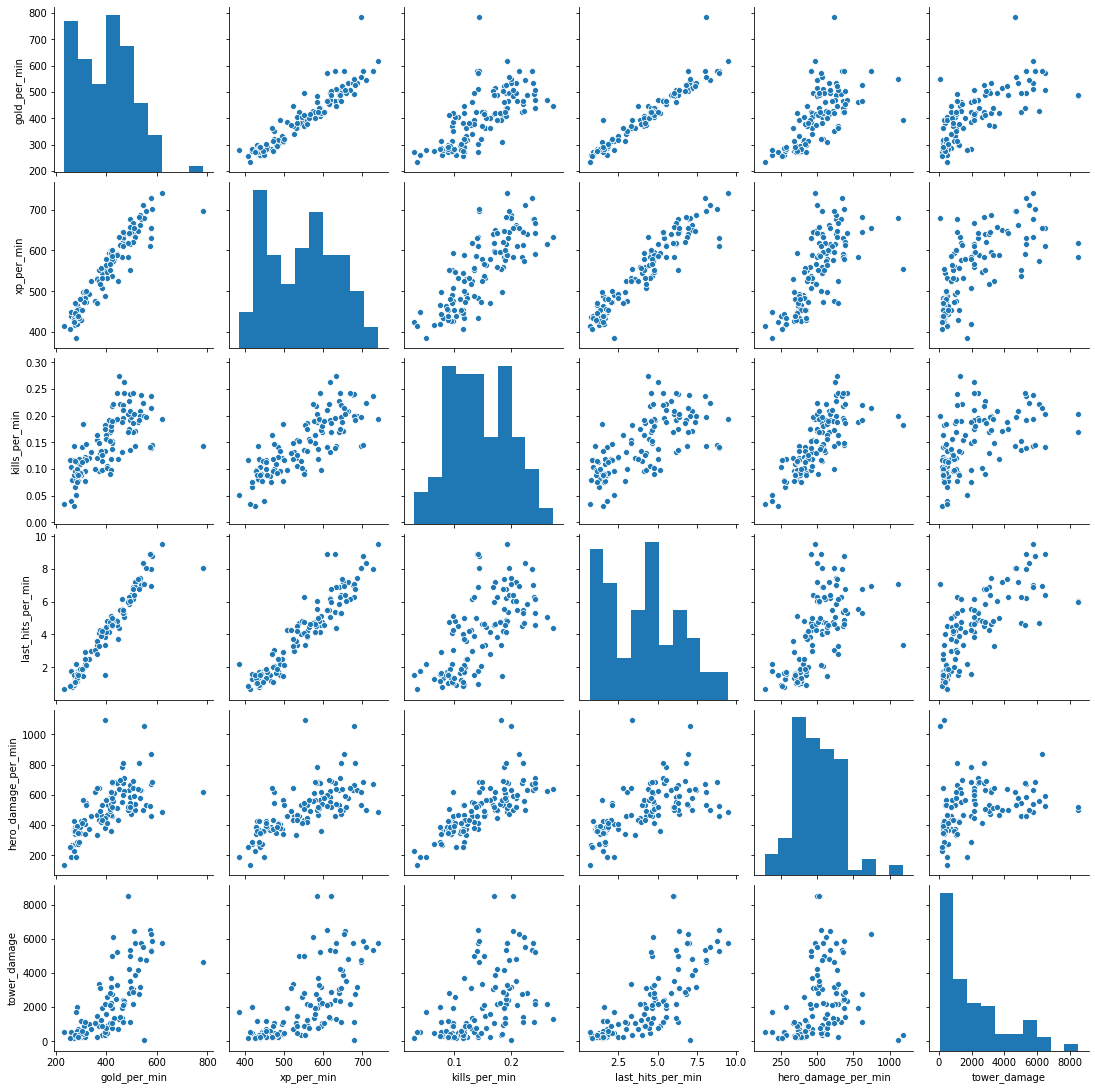

In [151]:
pairplot_data = hero_stats.drop([0, 1, "localized_name"], axis=1)
sns.pairplot(pairplot_data)

## basic dimensionality reduction with PCA... poor results

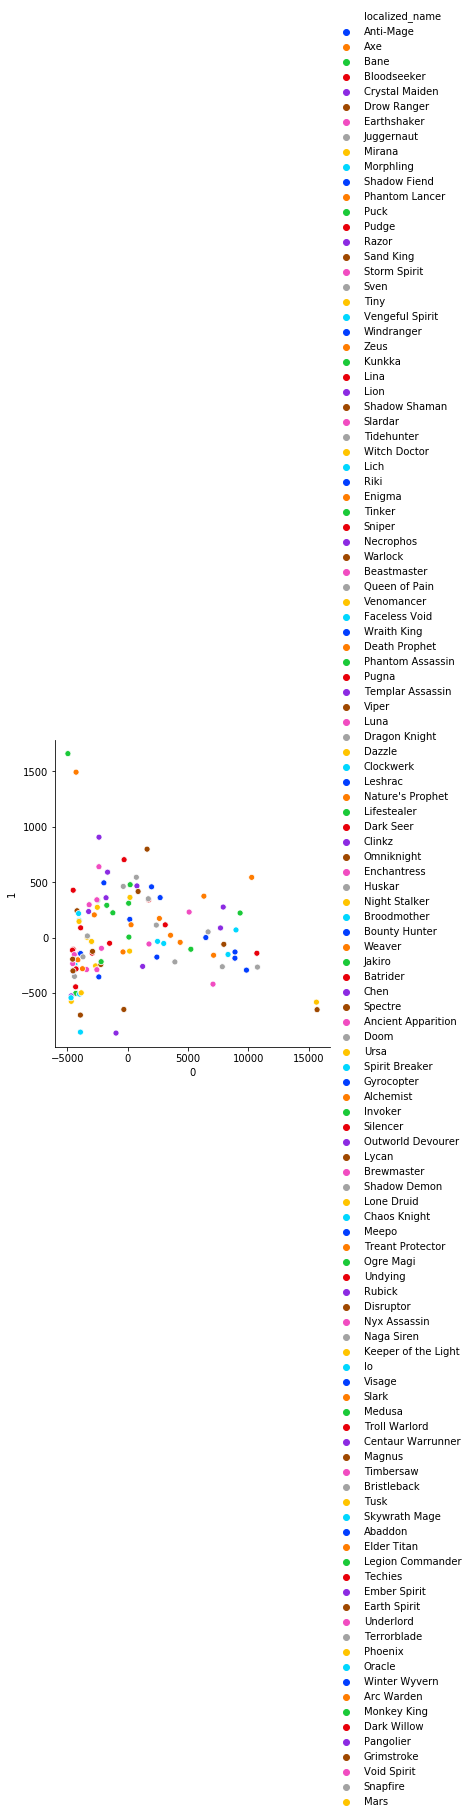

In [146]:
data = hero_stats.drop("localized_name", axis=1).values
target_names = np.array(hero_stats["localized_name"])

pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)

hero_stats.loc[:, 0] = X_r[:, 0]
hero_stats.loc[:, 1] = X_r[:, 1]


sns.relplot(x=0, y=1, hue="localized_name", data=hero_stats, palette="bright")  # doesn't show anything useful
# todo / to try: different clustering methods, normalize data first, 
# figure out a way to plot so that you can figure out which hero is which
# don't plot with a huge legend

In [140]:
hero_stats.loc[:, 0] = X_r[:, 0]
hero_stats.loc[:, 1] = X_r[:, 1]
